# CSE 151A - Numerical Optimization with `scipy.optimize.minimize`

There are many cases where we want to find the minimizer of some function. In these cases, we might use a *numerical optimization algorithm* to find the minimizer. Gradient descent is one such algorithm, but there are many others.

Numerical minimization works only when we can *evaluate* our function. For instance, numerical minimization can help us minimize $f(x) = 3x^7 - 1000 x^2 - 10$, but it won't help us minimize $g(x) = a x^7 + bx^2 - 10$, because we can't evaluate the latter.

The Python package `scipy` implements several numerical optimizers in its `scipy.optimize` submodule. You can get access to them with a simple `import`:

In [34]:
import scipy.optimize

One of the most important functions in this module is `scipy.optimize.minimize`. It provides a high-level interface to a bunch of numerical optimization algorithms. By default, the function uses a minimization algorithm known as BFGS. You can think of BFGS as gradient descent on steroids (but unlike gradient descent, BFGS needs to compute the *Hessian* matrix of second derivatives, which can be costly).

The documentation of the function is quite long; here are the first few lines:

In [35]:
print('\n'.join(scipy.optimize.minimize.__doc__.split('\n')[:15]))

Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized.

            ``fun(x, *args) -> float``

        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.


Apparently `scipy.optimize.minimize` accepts a function and a starting location and returns the minimizer. Let's try it out.

## Example: A Polynomial Function

Let's try to minimize $f(x) = 3x^7 - 1000x^2 - 10$. Notice that while this function is differentiable, its derivative is a polynomial of order 6. Solving for the roots of such a polynomial is quite difficult; as the [Abel-Ruffini Theorem](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem) shows, there is "no solution in radicals to general polynomial equations of degree five or higher with arbitrary coefficients".

In any case, we can minimize the problem easily using numerical optimization. We'll start by plotting it using `matplotlib`:

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

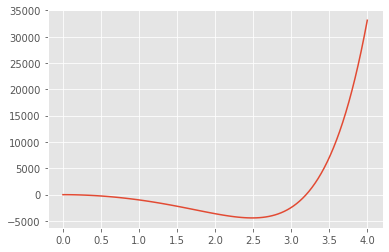

In [43]:
x = np.linspace(0, 4, 100)
y = 3*x**7 - 1000*x**2 - 10
plt.plot(x, y)

The minimizer looks to be at around 2.5. Let's use `scipy.optimize.minimize` to find it. First, we define a function:

In [44]:
def our_function(x):
    return 3*x**7 - 1000*x**2 - 10

Our function returns the value of the polynomial at whatever $x$ we put in:

In [46]:
our_function(1.3)

-1681.1754449000002

Now let's run `scipy.optimize.minimize`:

In [53]:
scipy.optimize.minimize(our_function, x0=2)

      fun: -4429.735143929261
 hess_inv: array([[0.00010014]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([2.48749456])

There is a lot of information here, but the important bit is `x: array([2.48749456])`. This is the location of the minimizer: it is around 2.487, as we expected.

The minimization will even work if we had made a bad first guess:

In [55]:
scipy.optimize.minimize(our_function, x0=200)

      fun: -4429.7351439292615
 hess_inv: array([[0.00010553]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 141
      nit: 43
     njev: 47
   status: 0
  success: True
        x: array([2.48749456])